In [2]:
#!/usr/bin/env python

import numpy as np
import matplotlib.pyplot as plt
from mapper import Mapper
import pickle
import argparse

In [6]:
def quaternion_to_euler_angle_vectorized1(w, x, y, z): #https://stackoverflow.com/questions/56207448/efficient-quaternions-to-euler-transformation
    ysqr = y * y

    t0 = +2.0 * (w * x + y * z)
    t1 = +1.0 - 2.0 * (x * x + ysqr)
    X = np.arctan2(t0, t1)

    t2 = +2.0 * (w * y - z * x)
    t2 = np.where(t2>+1.0,+1.0,t2)
    #t2 = +1.0 if t2 > +1.0 else t2

    t2 = np.where(t2<-1.0, -1.0, t2)
    #t2 = -1.0 if t2 < -1.0 else t2
    Y = np.arcsin(t2)

    t3 = +2.0 * (w * z + x * y)
    t4 = +1.0 - 2.0 * (ysqr + z * z)
    Z = np.arctan2(t3, t4)

    return X, Y, Z 

In [7]:
# object positions
positions = [[[-0.722115081136181, 0.685899907083555], [-0.5103113329789432, 0.11524020890368591], [1.072921252367443, -1.2517825892623438], [-0.6547678702616455, 0.32060397390709855], [-0.23847724727170716, 0.5750973308430863], [-1.1187277684429064, 0.8200553734789755], [-0.6002819171445773, 0.4091664421258032], [-0.8598061451746825, 0.8595773215433438], [0.004084085712583785, -0.9387556459512876], [-1.1841707224987494, 0.7278422424590446], [-0.4933439356782771, 0.325096360493174], [-0.7744355284665785, 0.995769718547199], [-0.37333967412707053, -0.13888040722740713], [-0.5233685409969868, -0.42272456237562994], [2.9735616076006663, 0.3653397532840375], [-0.9067857043663183, 0.7328274859363446], [-0.256609252508784, 0.2065004679930763], [-0.2863136938047459, 0.3529304991435596], [-0.129401291562519, -0.4555396731416024], [3.8994293610537447, -1.2410310484433797], [-0.7651685620948594, 0.7503992199982327], [-0.3202391111921816, 0.4808020990822725], [-0.6347277213483813, 0.11941948556607718], [-0.700452315109607, 0.5652725512870679], [-0.42010424594007867, 0.14152979524546305], [0.3413569629905835, -0.09745292655866866], [-1.0788039725132712, 0.8009404128062556], [-0.9818752274961491, 0.7158238039125698], [-1.0062804931387772, 0.7039719568143368], [-0.5266967403023008, 0.4504418333360494], [-0.5929748897897189, 0.634131135329835], [-0.3365518117833392, 0.5493023408099329]]]
# vehicle position
veh_pos = [-0.7267377015481262, 0.6861199384794572, 1.1471426234498394, 0.0028090797067042836, -0.013774918411128137, -0.8570309161427125, 0.5150731690445066]


In [8]:
# Create a mapper object
mapper = Mapper()

for i in range(100):
    zs = positions[0]
    Rs = [np.eye(2)*.1 for z in zs]
    zs = [np.array(z).reshape((2,1)) + np.random.multivariate_normal(np.zeros(2), R).reshape((2,1)) for z, R in zip(zs, Rs)]

    mapper.update(zs, Rs)

roll, pitch, yaw = quaternion_to_euler_angle_vectorized1(veh_pos[6], veh_pos[3], veh_pos[4], veh_pos[5])

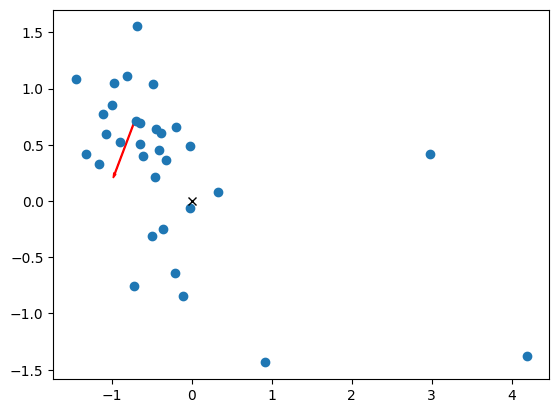

In [10]:
# Plot map
plt.plot(mapper.map_as_array()[:,0], mapper.map_as_array()[:,1], 'o')
# plot vehicle position and orientatio as a red arrow
plt.arrow(veh_pos[0], veh_pos[1], 0.5*np.cos(yaw), 0.5*np.sin(yaw), color='r', width=.01)
# plot the origin as a black cross
plt.plot(0, 0, 'kx')